![](https://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg)

# Project 1: [Titanic](https://www.kaggle.com/c/titanic/data)
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you will exercise your skills with loading data, python data structures, and Pandas to identify charactaristics of Titanic survivors!

---
#### Your goals should be to:
* Practice python programming including loops, conditionals, types, functions, and data structures
* Start thinking critically about manipulating, organizing, and interpreting data
* Troubleshoot errors

---
#### Getting Started:
* **fork** the repository on git.generalassemb.ly
* **clone** your forked repo

---
#### Submission:
* You should be working on a **fork** of the GA project one repository. 
* Use **git** to manage versions of your project. Make sure to `add`, `commit`, and `push` your changes to **your fork** of the github 
* Submit a link to your project repository in the submission form by **Friday, 9/29 11:59 PM**. You will then receive the solutions.
* Create a copy of your original notebook (file > make a copy in jupyter notebook)
* In the copy, use the solutions to correct your work. Make sure to take note of your successes and struggles. Did you learn anything new from correcting your work?
* Submit the corrected version by **Sunday, 10/1 11:59 PM** to receive instructor feedback on your work. ***Projects submitted after this deadline will not receive instructor feedback.***

### Considerations:

* You will be generating long data strutures- avoid displaying the whole thing. Display just the first or last few entries and look at the length or shape to check whether your code gives you back what you want and expect.
* Make functions whenever possiblle!
* Be explicit with your naming. You may forget what `this_list` is, but you will have an idea of what `passenger_fare_list` is. Variable naming will help you in the long run!
* Don't forget about tab autocomplete!
* Use markdown cells to document your planning, thoughts, and results. 
* Delete cells you will not include in your final submission
* Try to solve your own problems using this framework:
  1. Check your spelling
  2. Google your errors. Is it on stackoverflow?
  3. Ask your classmates
  4. Ask a TA or instructor
* Do not include errors or stack traces (fix them!)

# 1. Using the `with open()` method in the `csv` library, load the titanic dataset into a list of lists.

* The `type()` of your dataset should be `list`
* The `type()` of each element in your dataset should also be `list`
* The `len()` of your dataset should be 892 (892 rows, including the header)
* The `len()` of each row element in your dataset should be have a `len()` of 12
* Print out the first 3 rows including the header to check your data.

In [1]:
import csv
from IPython.display import display
import numpy as np
import pandas as pd

In [2]:
from pprint import pprint

In [3]:
with open ('titanic.csv') as file:
    reader = csv.reader(file, delimiter=',')
    titanic_list = list(reader)
    dataset_length = len(titanic_list)
    row_lenth = len(titanic_list[0])
    print('The length of dataset is: ' + str(dataset_length))
    print('The length of each row is: ' + str(row_lenth))
    print('The data type of the dataset is: ' + str(type(titanic_list)))
    print('The data type of each row/element in the dataset is: ' + str(type(titanic_list[1])))
    pprint(titanic_list[0:3])


The length of dataset is: 892
The length of each row is: 12
The data type of the dataset is: <class 'list'>
The data type of each row/element in the dataset is: <class 'list'>
[['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 ['1',
  '0',
  '3',
  'Braund, Mr. Owen Harris',
  'male',
  '22',
  '1',
  '0',
  'A/5 21171',
  '7.25',
  '',
  'S'],
 ['2',
  '1',
  '1',
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'female',
  '38',
  '1',
  '0',
  'PC 17599',
  '71.2833',
  'C85',
  'C']]


# 2. Separate the first header row from the rest of your dataset. 

* The header should be a list of the column names
* The data should be the rest of your data
* Display the header and the first row of the dataset zipped together using `zip`
* Your result should look like...


```
[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ...
 ('Embarked', 'S')]
 ```

In [4]:
header = titanic_list[0]
#print(header)
data = titanic_list[1:]
# data_2 = list(zip(header, data[1]))
# pprint(data_2)

new_titanic_list = []

for row in data: 
    new_titanic_list.append(list(zip(header, row)))
display(new_titanic_list[0:3])

[[('PassengerId', '1'),
  ('Survived', '0'),
  ('Pclass', '3'),
  ('Name', 'Braund, Mr. Owen Harris'),
  ('Sex', 'male'),
  ('Age', '22'),
  ('SibSp', '1'),
  ('Parch', '0'),
  ('Ticket', 'A/5 21171'),
  ('Fare', '7.25'),
  ('Cabin', ''),
  ('Embarked', 'S')],
 [('PassengerId', '2'),
  ('Survived', '1'),
  ('Pclass', '1'),
  ('Name', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'),
  ('Sex', 'female'),
  ('Age', '38'),
  ('SibSp', '1'),
  ('Parch', '0'),
  ('Ticket', 'PC 17599'),
  ('Fare', '71.2833'),
  ('Cabin', 'C85'),
  ('Embarked', 'C')],
 [('PassengerId', '3'),
  ('Survived', '1'),
  ('Pclass', '3'),
  ('Name', 'Heikkinen, Miss. Laina'),
  ('Sex', 'female'),
  ('Age', '26'),
  ('SibSp', '0'),
  ('Parch', '0'),
  ('Ticket', 'STON/O2. 3101282'),
  ('Fare', '7.925'),
  ('Cabin', ''),
  ('Embarked', 'S')]]

# 3. Using a `for` loop, load your data into a `dict` called `data_dict`.

* The keys of your `data_dict` should be `PassengerId`
* The values of your `data_dict` should be dictionaries...
  * Each of these dictionaries should reperesent a column value within a row
  * The keys should be the names of the columns
  * The values should be the values of that column
  
The beginning of your `data_dict` should look like: 

    {'1': {'Age': '22',
      'Cabin': '',
      'Embarked': 'S',
      'Fare': '7.25',
      'Name': 'Braund, Mr. Owen Harris',
      'Parch': '0',
      'Pclass': '3',
      'Sex': 'male',
      'SibSp': '1',
      'Survived': '0',
      'Ticket': 'A/5 21171'},
     '10': {'Age': '14',
      'Cabin': '',
      'Embarked': 'C',
      'Fare': '30.0708',
      'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
      'Parch': '0',
      'Pclass': '2',
      'Sex': 'female',
      'SibSp': '1',
      'Survived': '1',
      'Ticket': '237736'},
      ...
      }

In [5]:
data_dict = {}
for row in new_titanic_list:
    passenger_dict = {k:v for k,v in row}
    data_dict[passenger_dict['PassengerId']] = passenger_dict
    
#pprint(data_dict)

# 4. Repeat step 3 using a dictionary comprehension.

* Using `==`, check if your `data_dict` from your `for` loop is the same as the one from your dictionary comprehension.

In [6]:
data_dict_comp = {new_titanic_list[index][0][1]: {k:v for k,v in row} for index, row in enumerate(new_titanic_list)}
# pprint(data_dict_comp)


In [7]:
data_dict == data_dict_comp

True

# 5. Transform your `data_dict` to be oriented by column and call it `data_dict_columns`

* Currently, our `data_dict` is oriented by row, indexed by `"PassengerId"`. 
* Transform your data so that the title of each row is a key, the values are of type `list` and represent column vectors.

If you display `data_dict_columns`, the beginning should look like...

    {'Age': ['25',
      '36',
      '24',
      '40',
      '45',
      '2',
      '24',
      '28',
      '33',
      '26',
      '39',
      ...

In [8]:
#get list of dictionaries of all passenger info from data_dict_
columns = list(data_dict_comp.values())
# pprint(columns[0])

data_dict_columns = {}

#initialize empty list for the values
for key in columns[0]:
        data_dict_columns[key] = []
#loop through keys of all passenger dictionaries to get values and append values into list
for key_1 in data_dict_columns.keys():
    for passenger in (columns):
        value = passenger[key_1]
        data_dict_columns[key_1].append(value)

# pprint(data_dict_columns)     


# 6. Data Types

What is the current `type` of each column? What do you think the data type of each column *should* be? The data types in Python are...

* `int`
* `float`
* `str`
* `bool`
* `tuple`
* `list`
* `dict`
* `set`

In a markdown cell, describe what each column represents and what the `type` of each value should be. **Extra:** If you want to be fancy, use a [markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) to display your results.

#### Your answer here (double click here to edit this markdown cell, and press shift-enter exit edit mode!):

All the values are currently strings because each value is inside quotation marks. The table below shows the type that each column should be:

| Column Names  | Current Type  | Should be   |
| ------------- |:-------------:| -----------:|
| PassengerID   | Str           | int         |         
| Survived      | Str           | int         |
| Pclass        | Str           | int         |
| Name          | Str           | str         |
| Sex           | Str           | str         |
| Age           | Str           | float       |
| SibSp         | Str           | int         |
| Parch         | Str           | int         |
| Ticket        | Str           | str         |
| Fare          | Str           | float       |
| Cabin         | Str           | str         |
| Embarked      | Str           | str         |



# 7. Transform each column to the appropriate type if needed.

Build a function called `transform_column` that takes arguments for a `data_dict`, `column_name`, and `datatype`, and use it to transofm the columns that need transformation.

**NOTE:** There are values in this dataset that cannot be directly cast to a numerical value. Use `if/then` or `try/except` statements to handle errors. 

**To help identify potential sources of errors, explore the `set` of values in each column.**

In [9]:
def transform_column(column_name, datatype, data_dict = data_dict_columns):
    col_val = data_dict[column_name]
    datatype == float or int or bool
    for index, item in enumerate(col_val):
        try:
            col_val[index] = datatype(item)
        except:
            col_val[index] = np.nan
    return col_val


In [10]:
PassengerId_new = transform_column('PassengerId', int)
Survived_new = transform_column('Survived', int)
Age_new = transform_column('Age', float)
SibSp_new = transform_column('SibSp', int)
Parch_new = transform_column('Parch', int)
Fare_new = transform_column('Fare', float)
Pclass_new = transform_column('Pclass', int)


# 8. Build functions to calculate the mean, sample standard deviation, and median of a list of ints or floats. Use `scipy.stats.mode` or build your own mode function!


If you filled any missing values with `np.NaN`, you may need to handle that in your functions (look up `np.isnan()`).

If building a `mode` function is too difficult, you import mode from `scipy.stats` using `from scipy.stats import mode`.

**Optional:**  Build a function for calculating the Mode that returns the mode value *and* the count of that value. Mode is tricky, so start by building a function that counts the occurances of each value. You may also need to sort using a `key` with a `lambda function` inside. You may also find a `defaultdict` useful.

In [11]:
from scipy.stats import mode

Mean

In [12]:
def this_mean(data_list):
    data_list = [float(num) for num in data_list if not np.isnan(num)]
    return np.sum(data_list)/len(data_list)

Standard Deviation

In [13]:
def this_std(data_list):
    data_list = [float(num) for num in data_list if not np.isnan(num)]
    return np.std(data_list)

this_std(Age_new)

14.516321150817316

Median

In [14]:
def this_median(data_list):
    data_list = [float(num) for num in data_list if not np.isnan(num)]
    return np.median(data_list)

Mode

In [15]:
def this_mode(data_list):
    data_list = [float(num) for num in data_list if not np.isnan(num)]
    return mode(data_list)

# 9. Summary Statistics of Numerical Columns

For numerical columns, what is the mean, standard deviation, mean, and mode for that data? Which measure of central tendency is the most descriptive of each column? Why? Explain your answer in a markdown cell.

In [117]:
#Age
print('Age mean: ' + str(this_mean(Age_new)))
print('Age std: ' + str(this_std(Age_new)))
print('Age mode: ' + str(this_mode(Age_new)))
print('Age median ' + str(this_median(Age_new)))
#Fare
print('Fare mean: ' + str(this_mean(Fare_new)))
print('Fare std: ' + str(this_std(Fare_new)))
print('Fare mode: ' + str(this_mode(Fare_new)))
print('Fare median ' + str(this_median(Fare_new)))
# Pclass
print('Pclass mean: ' + str(this_mean(Pclass_new)))
print('Pclass std: ' + str(this_std(Pclass_new)))
print('Pclass mode: ' + str(this_mode(Pclass_new)))
print('Pclass median ' + str(this_median(Pclass_new)))
#Survived
print('Survived mean: ' + str(this_mean(Survived_new)))
print('Survived std: ' + str(this_std(Survived_new)))
print('Surived mode: ' + str(this_mode(Survived_new)))
print('Survived median ' + str(this_median(Survived_new)))
#Parch
print('Parch mean: ' + str(this_mean(Parch_new)))
print('Parch std: ' + str(this_std(Parch_new)))
print('Parch mode: ' + str(this_mode(Parch_new)))
print('Parch median ' + str(this_median(Parch_new)))
# Sibsp
print('SibSp mean: ' + str(this_mean(SibSp_new)))
print('SibSp std: ' + str(this_std(SibSp_new)))
print('SibSp mode: ' + str(this_mode(SibSp_new)))
print('Sibsp median ' + str(this_median(SibSp_new)))

Age mean: 29.6991176471
Age std: 14.5163211508
Age mode: ModeResult(mode=array([ 24.]), count=array([30]))
Age median 28.0
Fare mean: 32.2042079686
Fare std: 49.6655344448
Fare mode: ModeResult(mode=array([ 8.05]), count=array([43]))
Fare median 14.4542
Pclass mean: 2.30864197531
Pclass std: 0.83560193348
Pclass mode: ModeResult(mode=array([ 3.]), count=array([491]))
Pclass median 3.0
Survived mean: 0.383838383838
Survived std: 0.486319317867
Surived mode: ModeResult(mode=array([ 0.]), count=array([549]))
Survived median 0.0
Parch mean: 0.381593714927
Parch std: 0.805604761245
Parch mode: ModeResult(mode=array([ 0.]), count=array([678]))
Parch median 0.0
SibSp mean: 0.523007856341
SibSp std: 1.10212443509
SibSp mode: ModeResult(mode=array([ 0.]), count=array([608]))
Sibsp median 0.0


-  For the column age, the  median would be the most descriptive so you can see the central tendency of the age since there might be outliers of age that could have influenced the average age.
-  For the column Fare, the standard deviation would be the most descriptive so you can see the spread of fare from the mean. 
-  For the column Pclass, mode would be most descriptive to see what class most people were in on the Titanic.
-  For Survived, mean would be the most descriptive to see the probability of survival rate.


# 10. Splitting the Data to Predicting Survival

For all the passengers in the dataset, the mean survival rate is around .38 (38% of the passengers survived). From our data, we may be able to profile who survived and who didn't!

Split the data by pclass. Does the class a passenger was in affect survivability? You can do this by:
* Creating a list of `True` and `False` values conditional on a column's value
* Taking the mean of the `Survived` column where those values are `True`

In [102]:
pclass1 = [c == 1  for c in data_dict_columns['Pclass']]
pclass2 = [c == 2  for c in data_dict_columns['Pclass']]
pclass3 = [c == 3  for c in data_dict_columns['Pclass']]


pclass1_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if pclass1[index]]
pclass2_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if pclass2[index]]
pclass3_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if pclass3[index]]

print(np.mean(pclass1_survival))
print(np.mean(pclass2_survival))
print(np.mean(pclass3_survival))


0.62962962963
0.472826086957
0.242362525458


The class of the passenger affected survivability, passengers in class 1 had a higher rate of survival

# 11. Independent Work

Use the techniques from step 10 to make different conditional splits in the `Survived` column. Can you find a combination of splits that maximizes the survival rate?

In [100]:

mask_sib0 = [c == 0  for c in data_dict_columns['SibSp']]
mask_sib1 = [c == 1  for c in data_dict_columns['SibSp']]
mask_sib2 = [c == 2  for c in data_dict_columns['SibSp']]
mask_sibmore2 = [c > 2  for c in data_dict_columns['SibSp']]

mask_sib0_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_sib0[index]]
mask_sib1_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_sib1[index]]
mask_sib2_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_sib2[index]]
mask_sibmore2_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_sibmore2[index]]

print(np.mean(mask_sib0_survival))
print(np.mean(mask_sib1_survival))
print(np.mean(mask_sib2_survival))
print(np.mean(mask_sibmore2_survival))

0.345394736842
0.535885167464
0.464285714286
0.152173913043


In [101]:
mask_age10 = [c < 10  for c in data_dict_columns['Age']]
mask_age30 = [10 < c <= 30  for c in data_dict_columns['Age']]
mask_age50 = [30 < c <= 50  for c in data_dict_columns['Age']]
mask_agemore50 = [c > 50  for c in data_dict_columns['Age']]

age10_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_age10[index]]
age30_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_age30[index]]
age50_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_age50[index]]
agemore50_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_agemore50[index]]

print(np.mean(age10_survival))
print(np.mean(age30_survival))
print(np.mean(age50_survival))
print(np.mean(agemore50_survival))

0.612903225806
0.371014492754
0.423236514523
0.34375


In [103]:
mask_parch0 = [c == 0  for c in data_dict_columns['SibSp']]
mask_parch1 = [c == 1  for c in data_dict_columns['SibSp']]
mask_parch2 = [c == 2  for c in data_dict_columns['SibSp']]
mask_parchmore2 = [c > 2  for c in data_dict_columns['SibSp']]

mask_parch0_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_parch0[index]]
mask_parch1_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_parch1[index]]
mask_parch2_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_parch2[index]]
mask_parchmore2_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if mask_parchmore2[index]]

print(np.mean(mask_parch0_survival))
print(np.mean(mask_parch1_survival))
print(np.mean(mask_parch2_survival))
print(np.mean(mask_parch2_survival))

0.345394736842
0.535885167464
0.464285714286
0.464285714286


In [27]:
male = [c == 'male'  for c in data_dict_columns['Sex']]
female = [c == 'female'  for c in data_dict_columns['Sex']]

male_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if male[index]]
female_survival = [survived for index, survived in enumerate(data_dict_columns["Survived"]) if female[index]]

print(np.mean(male_survival))
print(np.mean(female_survival))

0.188908145581
0.742038216561


Females and children in lower age group and higher class has the highest rate of survival

# 12. Distributions

### A) For each of your numeric features, use `pyplot` subplots to plot a hisogram for each feature.

* Make sure to title each subplot.
* If you get an error, it may be caused by `np.NaN`

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
[x for x in data_dict_columns['Parch'] if not np.isnan(x)]

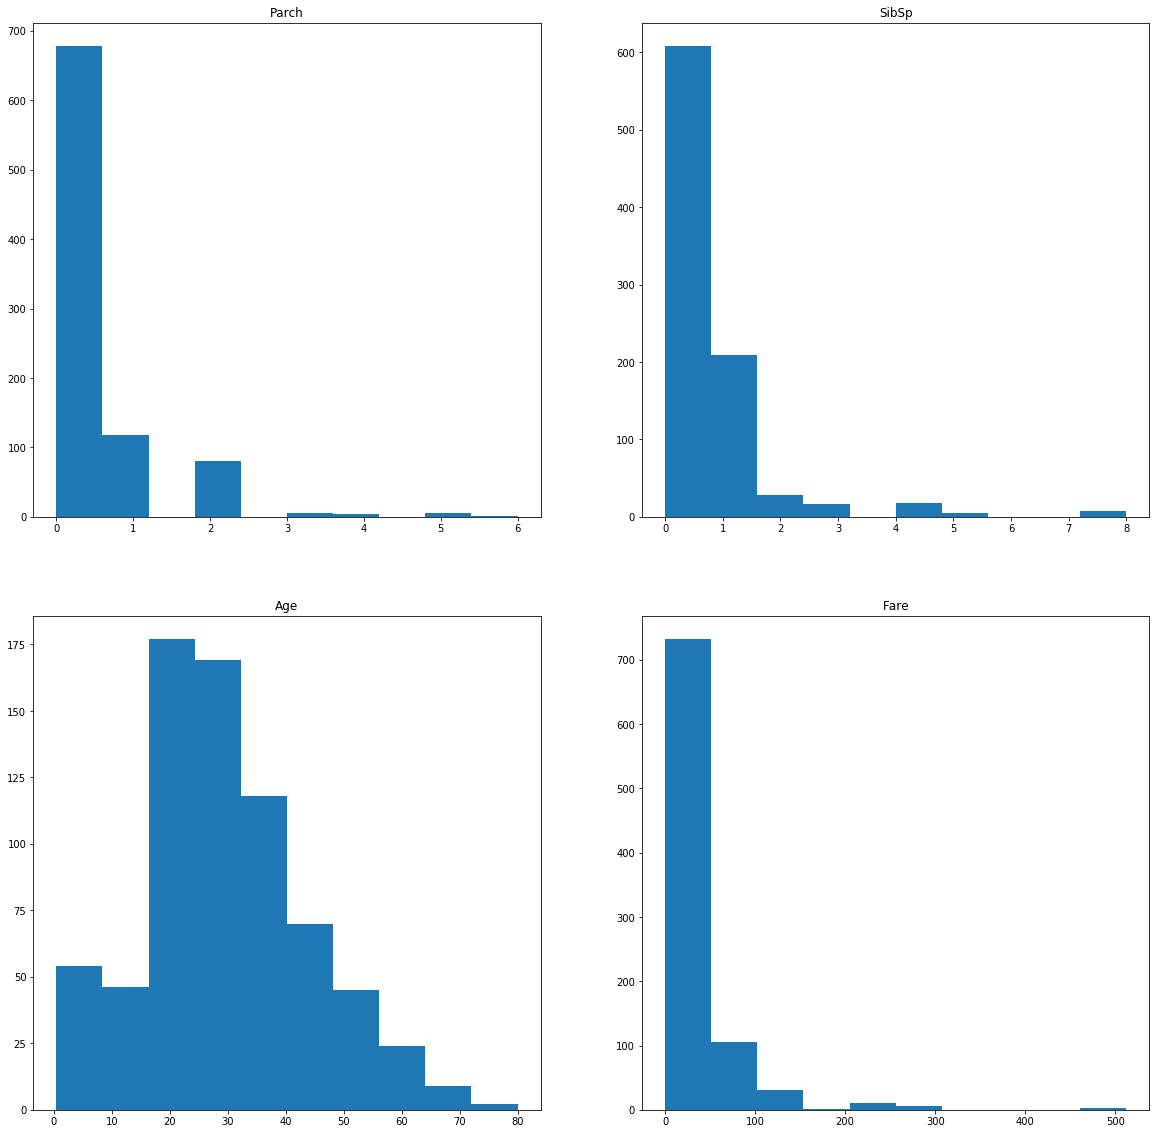

In [82]:
# Your code here import matplotlib.pyplot as plt
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0,0].hist([x for x in data_dict_columns['Parch'] if not np.isnan(x)])
ax[0,0].title.set_text('Parch')
ax[0,1].hist(([x for x in data_dict_columns['SibSp'] if not np.isnan(x)]))
ax[0,1].title.set_text('SibSp')
ax[1,0].hist(([x for x in data_dict_columns['Age'] if not np.isnan(x)]))
ax[1,0].title.set_text('Age')
ax[1,1].hist(([x for x in data_dict_columns['Fare'] if not np.isnan(x)]))
ax[1,1].title.set_text('Fare')

### B) for each of these values, what's the 90% confidence interval of the population mean?

* Create a function to find the confidence interval, and use it on each of the numeric columns.
* What's your interpretation of the interval?

In [112]:
z_score(.9)

-1.6448536269514729

In [87]:
from scipy import stats
def z_score(confidence):
    return stats.norm.ppf((1-confidence)/2)

def con_interval(data_list, confidence):
    mean = this_mean(data_list)
    z = z_score(confidence)
    s = this_std(data_list)
    square = np.sqrt(len(data_list))
    low_tail = mean + z*s/square
    high_tail = mean - z*s/square
    return low_tail, high_tail


In [113]:
Age_conf = con_interval([x for x in data_dict_columns['Age'] if not np.isnan(x)], .90)
Age_conf

(28.8055350160034, 30.59270027811424)

Base on the data, there's a 90% chance that the population mean of age is between 28.80 and 30.60

In [119]:
Fare_conf = con_interval([x for x in data_dict_columns['Fare'] if not np.isnan(x)], .90)
Fare_conf

(29.467405089819092, 34.941010847330183)

Base on the data, there's a 90% chance that the population mean of fare is between 29.47 and 34.94

In [114]:
Parch_conf = con_interval([x for x in data_dict_columns['Parch'] if not np.isnan(x)], .90)
Parch_conf

(0.33720113052494716, 0.42598629932914933)

Base on the data, there's a 90% chance that the population mean of parch is between 0.38 and 0.43

In [118]:
SibSp_conf = con_interval([x for x in data_dict_columns['SibSp'] if not np.isnan(x)], .90)
SibSp_conf

(0.4622756532063742, 0.58374005947600505)

Base on the data, there's a 90% chance that the population mean of Sibsp is between 0.46 and 0.58

# 13. Pandas

### A: Load the titanic csv into a `DataFrame` using `pd.read_csv()`

In [19]:
import pandas as pd

In [20]:
titanic = pd.read_csv('titanic.csv')

### B: Display the first 5 rows, the last 4 rows, and a sample of 3 rows.

In [21]:
titanic.iloc[0:6]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [22]:
titanic.iloc[-4:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [23]:
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.500,E40,C
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,NaN,C
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.850,NaN,S


### C: Create a row mask that is `True` when `Pclass == 3`. Use this to mask your `DataFrame`. Find the mean of the `Survived` column. Is it the same as what we calculated in part 10?

In [24]:
pclass3_mask = titanic[titanic['Pclass'] == 3]
pclass3_mask
pclass3_mask['Survived'].mean()

0.24236252545824846

This is the same mean as we calculated in part 10

### D: Using a `.groupby()`, what is the mean of the survival column grouped by `Pclass` and `Sex`. What are your observations?

In [72]:
titanic.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

Females in class 1 has a much higher chance of survival and male in class 3 has the lowest chance of survival

### E: Survival Rate by Age Range:  `pd.cut()` takes two arguments: A `list`, `Series`, or `array`, and a list of bins. Create a new column in your `DataFrame` using `pd.cut()` that groups your ages into bins of 5 years. Then, use `.groupby()` to display the survival rate and count for each age group

In [26]:
age_bins =[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

In [93]:
# Your code here
pd.cut(titanic['Age'], age_bins)
titanic['Age_bin'] = pd.cut(titanic['Age'], age_bins)
titanic.head()
display(titanic.groupby(['Age_bin'])['Survived'].mean())
display(titanic.groupby(['Age_bin'])['Survived'].count())

Age_bin
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    1.000000
Name: Survived, dtype: float64

Age_bin
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Survived, dtype: int64

# 14. Hypothesis Testing

### A) Hypothesis:

Create a null and alternate hypothesis to ask the following quesiton: Was the `Age` of survivors different from that of people who didn't survive?

**Hypotheses:**

$H_0$: The mean age of survivors is the same as the mean age of people who did not survive

$H_1$: The mean age of surivors is diffrent than the mean age of those who did not survive

### B) T-Testing

Use a t-test to test your null hypothesis. What's the p-value? What's your interpretation? Do you accept or reject your null hypothesis? What does this mean in terms of `Age`?

In [62]:
from scipy import stats

In [63]:
ttest = stats.ttest_ind

In [66]:
t_survived = titanic[titanic['Survived'] == 1] ['Age'].dropna()
t_not_survived = titanic[titanic['Survived'] == 0] ['Age'].dropna()           


In [67]:
ttest(t_survived, t_not_survived)

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

The pvalue is 0.039 which means that I would reject my null hypothesis that says the average age of survivors is the same as the avereage age of those who did not survive. This means that Age was a factor in the chance of survival on the Titanic.

# 13. Write-up

Use markdown cells to answer the following questions:

1. What is the main difference between a list and a tuple?
    - A list is mutable and is enclosed by []
    - A tuple is not mutable and is enclosed by ()
2. Can you iterate over a dictionary? If so, how?
   -  Yes, you can iterate over a dictionary with a for loop and using the dictionary.items function
3. What is the term for a list or array of `True` and `False` values used to select certain rows or columns in a `DataFrame`?
    -  Masking
4. If you have a continuous variable, when would the median be a better descriptor than the mean? Why?
    -  If you have outliers in your data, it would be better to take the median because the outliers would skew the mean.
5. Give a qualitative description of the survivors of the titanic based on the effects of your splits in the data on survival rate. Or, given a row, what columns would you look at to guess if they survived?
    -  Given a row, you can look at column "Sex" and/or "Class" to guess if they survived


# 14. Evaluation

Please use markdown cells to submit your responses. 

1. What was easy for you in this project?
    - manipulating data using pandas and dataframe
2. What was difficult?
    - statstics sections and building/separating the dictionaries
3. Where did you make the most improvement?
    - I got better at writing for loops and understanding how to break down codes into smaller chunks to get my final codes
4. Where would you like to improve?
    - Calculating stats and knowing which functions/program to use when I need to reorganize dictionary and just in general how to use different types of functions, built-in packages